# Alpha Algorithm for Process Mining
**Workflow Mining: Discovering Process Models from Event Logs** (_Wil van der Aalst, Ton Weijters, and Laura Maruster_)

In [33]:
%reload_ext autoreload
%autoreload 2
from practical.ProcessMining.group1.task2.alphaminer import AlphaMiner
from practical.ProcessMining.group1.shared import utils
import pm4py

## Basic Example from the Paper
A simple event log to illustrate the idea behind the algorithm. 

`{ABCD, ACBD, AED}`

In [34]:
simple_log = utils.event_log_to_csv([("a", "b", "c", "d"), ("a", "c", "b", "d"), ("a", "e", "d")])
miner_simple = AlphaMiner(simple_log)
miner_simple.event_log.head()

,case_id,activity,activity_id
0,1,a,0
1,1,b,1
2,1,c,2
3,1,d,3
4,2,a,0


### 1. Event Log to Footprint Matrix

Steps 1-4 of the Alpha algorithm

In [35]:
print(miner_simple.footprint_matrix())

   a   b   c  d  e
a  #   →   →  #  →
b  ←   #  ||  →  #
c  ←  ||   #  →  #
d  #   ←   ←  #  ←
e  ←   #   #  →  #


In [36]:
footprints = miner_simple.discover_footprints()
for key in footprints.keys():
    print(f"{key}: \n{footprints[key]}\n")

dfg: 
{('a', 'e'), ('a', 'b'), ('e', 'd'), ('c', 'b'), ('b', 'c'), ('b', 'd'), ('a', 'c'), ('c', 'd')}

sequence: 
{('a', 'e'), ('a', 'b'), ('e', 'd'), ('b', 'd'), ('a', 'c'), ('c', 'd')}

parallel: 
{('c', 'b'), ('b', 'c')}

activities: 
{'c', 'd', 'b', 'a', 'e'}

start_activities: 
{'a'}

end_activities: 
{'d'}

min_trace_length: 
3



In [37]:
miner_simple.print_pairs()

Following pairs:
[({'a'}, {'b'}), ({'b'}, {'c'}), ({'a'}, {'e'}), ({'c'}, {'b'}), ({'e'}, {'d'}), ({'c'}, {'d'}), ({'a'}, {'c'}), ({'b'}, {'d'})]

Parallel pairs:
[({'b'}, {'c'}), ({'c'}, {'b'})]

Sequential pairs:
[({'a'}, {'b'}), ({'a'}, {'e'}), ({'e'}, {'d'}), ({'c'}, {'d'}), ({'a'}, {'c'}), ({'b'}, {'d'})]

Not following pairs:
[({'a'}, {'a'}), ({'a'}, {'d'}), ({'b'}, {'b'}), ({'b'}, {'e'}), ({'c'}, {'c'}), ({'c'}, {'e'}), ({'d'}, {'a'}), ({'d'}, {'d'}), ({'e'}, {'b'}), ({'e'}, {'c'}), ({'e'}, {'e'})]

Before pairs:
[({'b'}, {'a'}), ({'c'}, {'a'}), ({'d'}, {'b'}), ({'d'}, {'c'}), ({'d'}, {'e'}), ({'e'}, {'a'})]

Maximal pairs:
[({'a'}, {'e', 'b'}), ({'a'}, {'c', 'e'}), ({'c', 'e'}, {'d'}), ({'e', 'b'}, {'d'})]



### 2. Footprint Matrix to Process Graph
Steps 5-8 of the Alpha algorithm

In [38]:
miner_simple.get_maximal_pairs()

[({'a'}, {'b', 'e'}),
 ({'a'}, {'c', 'e'}),
 ({'c', 'e'}, {'d'}),
 ({'b', 'e'}, {'d'})]

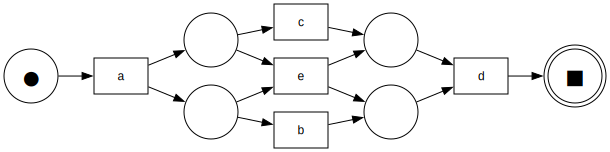

In [39]:
miner_simple.build_and_visualize_petrinet()

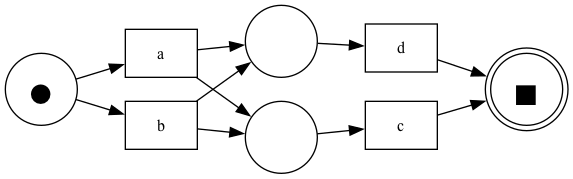

In [40]:
net, start, end = pm4py.discover_petri_net_alpha(utils.import_csv("../shared/example_files/slides-example.csv"))
pm4py.view_petri_net(net, start, end)

## Extended Example
A slightly more complex example of an event log

In [41]:
utils.import_xes("../shared/example_files/running-example.xes").head()

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 11:02:00+00:00,50,Pete,14,1
1,examine thoroughly,2010-12-31 10:06:00+00:00,400,Sue,15,1
2,check ticket,2011-01-05 15:12:00+00:00,100,Mike,16,1
3,decide,2011-01-06 11:18:00+00:00,200,Sara,17,1
4,reject request,2011-01-07 14:24:00+00:00,200,Pete,18,1


In [42]:
miner_extended = AlphaMiner("../shared/example_files/running-example.xes")
miner_extended.event_log.head()

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

,case_id,activity,activity_id
0,1,register request,5
1,1,examine thoroughly,3
2,1,check ticket,0
3,1,decide,1
4,1,reject request,7


### 1. Event Log to Footprint Matrix

Steps 1-4 of the Alpha algorithm

In [43]:
miner_extended.footprint_matrix()

,check ticket,decide,examine casually,examine thoroughly,pay compensation,register request,reinitiate request,reject request
check ticket,#,→,||,||,#,←,←,#
decide,←,#,←,←,→,#,→,→
examine casually,||,→,#,#,#,←,←,#
examine thoroughly,||,→,#,#,#,←,←,#
pay compensation,#,←,#,#,#,#,#,#
register request,→,#,→,→,#,#,#,#
reinitiate request,→,←,→,→,#,#,#,#
reject request,#,←,#,#,#,#,#,#


In [44]:
footprints = miner_extended.discover_footprints()
for key in footprints.keys():
    print(f"{key}: \n{footprints[key]}\n")

dfg: 
{('decide', 'reinitiate request'), ('examine thoroughly', 'decide'), ('register request', 'examine thoroughly'), ('examine casually', 'check ticket'), ('check ticket', 'examine casually'), ('reinitiate request', 'examine casually'), ('reinitiate request', 'check ticket'), ('check ticket', 'decide'), ('examine casually', 'decide'), ('check ticket', 'examine thoroughly'), ('decide', 'reject request'), ('examine thoroughly', 'check ticket'), ('register request', 'check ticket'), ('register request', 'examine casually'), ('decide', 'pay compensation'), ('reinitiate request', 'examine thoroughly')}

sequence: 
{('decide', 'reinitiate request'), ('examine thoroughly', 'decide'), ('register request', 'examine thoroughly'), ('reinitiate request', 'examine casually'), ('reinitiate request', 'check ticket'), ('check ticket', 'decide'), ('examine casually', 'decide'), ('decide', 'reject request'), ('register request', 'check ticket'), ('register request', 'examine casually'), ('decide', 'pa

In [45]:
miner_extended.print_pairs()

Following pairs:
[({'check ticket'}, {'decide'}), ({'reinitiate request'}, {'examine casually'}), ({'examine casually'}, {'decide'}), ({'examine thoroughly'}, {'decide'}), ({'check ticket'}, {'examine thoroughly'}), ({'examine casually'}, {'check ticket'}), ({'decide'}, {'pay compensation'}), ({'examine thoroughly'}, {'check ticket'}), ({'check ticket'}, {'examine casually'}), ({'decide'}, {'reject request'}), ({'register request'}, {'check ticket'}), ({'reinitiate request'}, {'check ticket'}), ({'register request'}, {'examine thoroughly'}), ({'decide'}, {'reinitiate request'}), ({'reinitiate request'}, {'examine thoroughly'}), ({'register request'}, {'examine casually'})]

Parallel pairs:
[({'check ticket'}, {'examine thoroughly'}), ({'examine casually'}, {'check ticket'}), ({'examine thoroughly'}, {'check ticket'}), ({'check ticket'}, {'examine casually'})]

Sequential pairs:
[({'check ticket'}, {'decide'}), ({'reinitiate request'}, {'examine casually'}), ({'examine casually'}, {'dec

### 2. Footprint Matrix to Process Graph
Steps 5-8 of the Alpha algorithm

In [46]:
miner_extended.get_maximal_pairs()

[({'decide'}, {'pay compensation', 'reinitiate request'}),
 ({'reinitiate request'}, {'examine casually', 'examine thoroughly'}),
 ({'check ticket'}, {'decide'}),
 ({'decide'}, {'reinitiate request', 'reject request'}),
 ({'register request', 'reinitiate request'}, {'check ticket'}),
 ({'register request', 'reinitiate request'}, {'examine thoroughly'}),
 ({'decide'}, {'pay compensation', 'reject request'}),
 ({'register request', 'reinitiate request'}, {'examine casually'}),
 ({'register request'}, {'examine casually', 'examine thoroughly'}),
 ({'examine casually', 'examine thoroughly'}, {'decide'})]

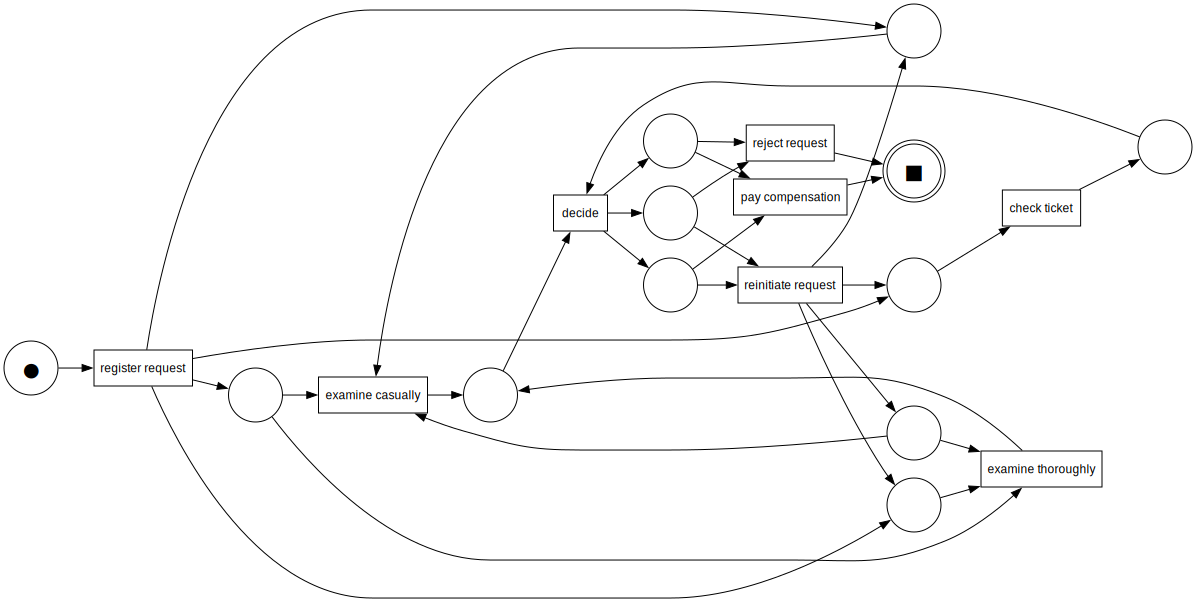

In [47]:
miner_extended.build_and_visualize_petrinet()

## Limitations

The algorithm has several limitations that are important to consider:

- Implicit places (places that are redundant)
- Loops of length 1 and 2
- Non-local dependencies


- Representational bias (cannot discover transitions with duplicate or invisible labels)
- Discovered model does not need to be sound
- Noise (infrequent behaviour/incorrectly recorded events)
- Incompleteness (missing events)

### Implicit Places
The algorithm does not discover implicit places, which are places that are redundant in the model. For example, in the following event log, the Alpha algorithm would discover the following model:

`{ACEG, AECG, BDFG, BFDG}`

In [48]:
implicit_log = utils.event_log_to_csv([("a", "c", "e", "g"), ("a", "e", "c", "g"), ("b", "d", "f", "g"), ("b", "f", "d", "g")])
miner_implicit = AlphaMiner(implicit_log)
miner_implicit.event_log.head()

,case_id,activity,activity_id
0,1,a,0
1,1,c,2
2,1,e,4
3,1,g,6
4,2,a,0


In [49]:
print(miner_implicit.footprint_matrix())

   a  b   c   d   e   f  g
a  #  #   →   #   →   #  #
b  #  #   #   →   #   →  #
c  ←  #   #   #  ||   #  →
d  #  ←   #   #   #  ||  →
e  ←  #  ||   #   #   #  →
f  #  ←   #  ||   #   #  →
g  #  #   ←   ←   ←   ←  #


In [50]:
miner_implicit.print_pairs()

Following pairs:
[({'c'}, {'e'}), ({'a'}, {'e'}), ({'b'}, {'f'}), ({'e'}, {'g'}), ({'e'}, {'c'}), ({'a'}, {'c'}), ({'c'}, {'g'}), ({'f'}, {'g'}), ({'d'}, {'g'}), ({'f'}, {'d'}), ({'b'}, {'d'}), ({'d'}, {'f'})]

Parallel pairs:
[({'c'}, {'e'}), ({'e'}, {'c'}), ({'f'}, {'d'}), ({'d'}, {'f'})]

Sequential pairs:
[({'a'}, {'e'}), ({'b'}, {'f'}), ({'e'}, {'g'}), ({'a'}, {'c'}), ({'c'}, {'g'}), ({'f'}, {'g'}), ({'d'}, {'g'}), ({'b'}, {'d'})]

Not following pairs:
[({'a'}, {'a'}), ({'a'}, {'b'}), ({'a'}, {'d'}), ({'a'}, {'f'}), ({'a'}, {'g'}), ({'b'}, {'a'}), ({'b'}, {'b'}), ({'b'}, {'c'}), ({'b'}, {'e'}), ({'b'}, {'g'}), ({'c'}, {'b'}), ({'c'}, {'c'}), ({'c'}, {'d'}), ({'c'}, {'f'}), ({'d'}, {'a'}), ({'d'}, {'c'}), ({'d'}, {'d'}), ({'d'}, {'e'}), ({'e'}, {'b'}), ({'e'}, {'d'}), ({'e'}, {'e'}), ({'e'}, {'f'}), ({'f'}, {'a'}), ({'f'}, {'c'}), ({'f'}, {'e'}), ({'f'}, {'f'}), ({'g'}, {'a'}), ({'g'}, {'b'}), ({'g'}, {'g'})]

Before pairs:
[({'c'}, {'a'}), ({'d'}, {'b'}), ({'e'}, {'a'}), ({'f'}, {

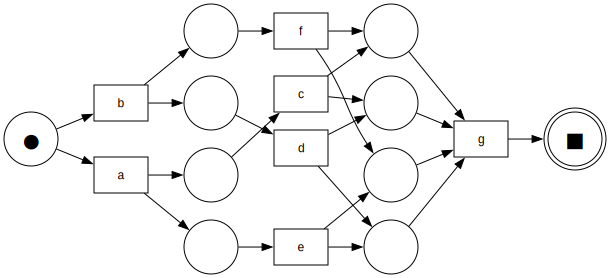

In [51]:
miner_implicit.build_and_visualize_petrinet()

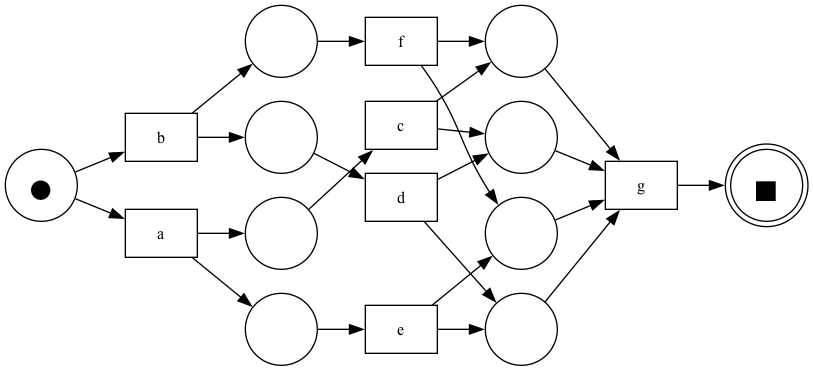

In [52]:
net, start, end = pm4py.discover_petri_net_alpha(utils.import_csv(implicit_log))
pm4py.view_petri_net(net, start, end)

### Loops of Length 1 and 2

The algorithm does not discover loops of length 1 and 2. For example, in the following event log, the Alpha algorithm would discover the following model:

`{AC, ABC, ABBC, ABBBBC}`
`{ABD, ABCBD, ABCBCBD}`

In [53]:
loop1_log = utils.event_log_to_csv([("a", "c"), ("a", "b", "c"), ("a", "b", "b", "c"), ("a", "b", "b", "b", "b", "c")])
miner_loop1 = AlphaMiner(loop1_log)
miner_loop1.event_log.head()

,case_id,activity,activity_id
0,1,a,0
1,1,c,2
2,2,a,0
3,2,b,1
4,2,c,2


In [54]:
print(miner_loop1.footprint_matrix())

   a   b  c
a  #   →  →
b  ←  ||  →
c  ←   ←  #


In [55]:
miner_loop1.print_pairs()

Following pairs:
[({'a'}, {'b'}), ({'a'}, {'c'}), ({'b'}, {'c'}), ({'b'}, {'b'})]

Parallel pairs:
[({'b'}, {'b'})]

Sequential pairs:
[({'a'}, {'b'}), ({'a'}, {'c'}), ({'b'}, {'c'})]

Not following pairs:
[({'a'}, {'a'}), ({'c'}, {'c'})]

Before pairs:
[({'b'}, {'a'}), ({'c'}, {'a'}), ({'c'}, {'b'})]

Maximal pairs:
[({'a'}, {'c'})]



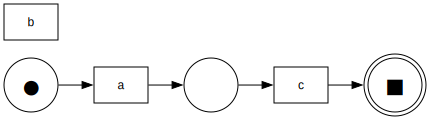

In [56]:
miner_loop1.build_and_visualize_petrinet()

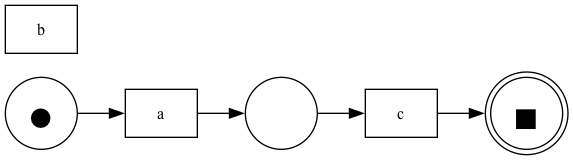

In [57]:
net, start, end = pm4py.discover_petri_net_alpha(utils.import_csv(loop1_log))
pm4py.view_petri_net(net, start, end)

In [58]:
loop2_log = utils.event_log_to_csv([("a", "b", "d"), ("a", "b", "c", "b", "d"), ("a", "b", "c", "b", "c", "b", "d")])
miner_loop2 = AlphaMiner(loop2_log)
miner_loop2.event_log

,case_id,activity,activity_id
0,1,a,0
1,1,b,1
2,1,d,3
3,2,a,0
4,2,b,1
5,2,c,2
6,2,b,1
7,2,d,3
8,3,a,0
9,3,b,1


In [59]:
print(miner_loop2.footprint_matrix())

   a   b   c  d
a  #   →   #  #
b  ←   #  ||  →
c  #  ||   #  #
d  #   ←   #  #


In [60]:
miner_loop2.print_pairs()

Following pairs:
[({'a'}, {'b'}), ({'b'}, {'c'}), ({'b'}, {'d'}), ({'c'}, {'b'})]

Parallel pairs:
[({'b'}, {'c'}), ({'c'}, {'b'})]

Sequential pairs:
[({'a'}, {'b'}), ({'b'}, {'d'})]

Not following pairs:
[({'a'}, {'a'}), ({'a'}, {'c'}), ({'a'}, {'d'}), ({'b'}, {'b'}), ({'c'}, {'a'}), ({'c'}, {'c'}), ({'c'}, {'d'}), ({'d'}, {'a'}), ({'d'}, {'c'}), ({'d'}, {'d'})]

Before pairs:
[({'b'}, {'a'}), ({'d'}, {'b'})]

Maximal pairs:
[({'a'}, {'b'}), ({'b'}, {'d'})]



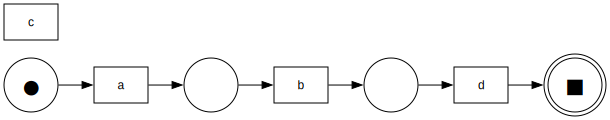

In [61]:
miner_loop2.build_and_visualize_petrinet()

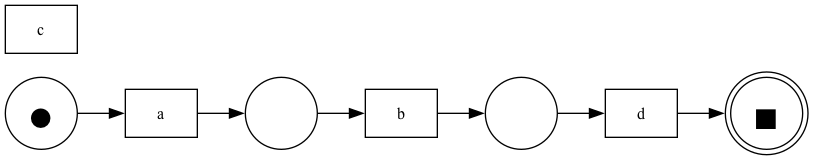

In [62]:
net, start, end = pm4py.discover_petri_net_alpha(utils.import_csv(loop2_log))
pm4py.view_petri_net(net, start, end)

### Non-Local Dependencies

The algorithm does not discover non-local dependencies. For example, in the following event log, the Alpha algorithm would discover the following model:

`{ACD, BCE}`

In [63]:
non_local_log = utils.event_log_to_csv([("a", "c", "d"), ("b", "c", "e")])
miner_non_local = AlphaMiner(non_local_log)
miner_non_local.event_log.head()

,case_id,activity,activity_id
0,1,a,0
1,1,c,2
2,1,d,3
3,2,b,1
4,2,c,2


In [64]:
print(miner_non_local.footprint_matrix())

   a  b  c  d  e
a  #  #  →  #  #
b  #  #  →  #  #
c  ←  ←  #  →  →
d  #  #  ←  #  #
e  #  #  ←  #  #


In [65]:
miner_non_local.print_pairs()

Following pairs:
[({'c'}, {'d'}), ({'a'}, {'c'}), ({'b'}, {'c'}), ({'c'}, {'e'})]

Parallel pairs:
[]

Sequential pairs:
[({'c'}, {'d'}), ({'a'}, {'c'}), ({'b'}, {'c'}), ({'c'}, {'e'})]

Not following pairs:
[({'a'}, {'a'}), ({'a'}, {'b'}), ({'a'}, {'d'}), ({'a'}, {'e'}), ({'b'}, {'a'}), ({'b'}, {'b'}), ({'b'}, {'d'}), ({'b'}, {'e'}), ({'c'}, {'c'}), ({'d'}, {'a'}), ({'d'}, {'b'}), ({'d'}, {'d'}), ({'d'}, {'e'}), ({'e'}, {'a'}), ({'e'}, {'b'}), ({'e'}, {'d'}), ({'e'}, {'e'})]

Before pairs:
[({'c'}, {'a'}), ({'c'}, {'b'}), ({'d'}, {'c'}), ({'e'}, {'c'})]

Maximal pairs:
[({'c'}, {'e', 'd'}), ({'a', 'b'}, {'c'})]



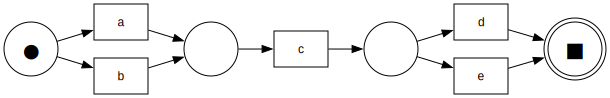

In [66]:
miner_non_local.build_and_visualize_petrinet()

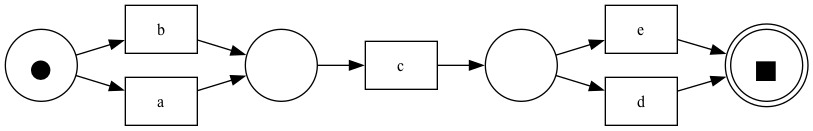

In [67]:
net, start, end = pm4py.discover_petri_net_alpha(utils.import_csv(non_local_log))
pm4py.view_petri_net(net, start, end)

### Representational Bias

The algorithm has a representational bias, as it cannot discover transitions with duplicate or invisible labels. For example, in the following event log, the Alpha algorithm would discover the following model:

`{ABC, AC}`

In [68]:
representational_log = utils.event_log_to_csv([("a", "b", "c"), ("a", "c")])
miner_representational = AlphaMiner(representational_log)
miner_representational.event_log

,case_id,activity,activity_id
0,1,a,0
1,1,b,1
2,1,c,2
3,2,a,0
4,2,c,2


In [69]:
print(miner_representational.footprint_matrix())

   a  b  c
a  #  →  →
b  ←  #  →
c  ←  ←  #


In [70]:
miner_representational.print_pairs()

Following pairs:
[({'a'}, {'b'}), ({'a'}, {'c'}), ({'b'}, {'c'})]

Parallel pairs:
[]

Sequential pairs:
[({'a'}, {'b'}), ({'a'}, {'c'}), ({'b'}, {'c'})]

Not following pairs:
[({'a'}, {'a'}), ({'b'}, {'b'}), ({'c'}, {'c'})]

Before pairs:
[({'b'}, {'a'}), ({'c'}, {'a'}), ({'c'}, {'b'})]

Maximal pairs:
[({'a'}, {'b'}), ({'a'}, {'c'}), ({'b'}, {'c'})]



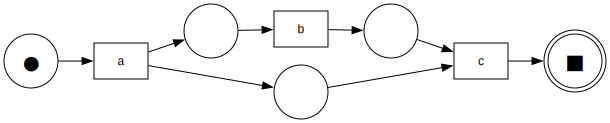

In [71]:
miner_representational.build_and_visualize_petrinet()

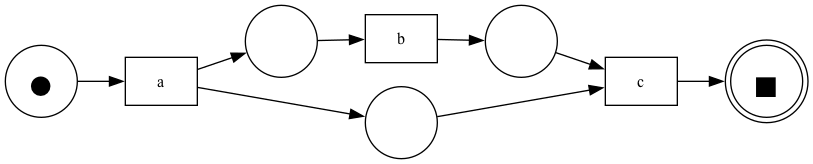

In [72]:
net, start, end = pm4py.discover_petri_net_alpha(utils.import_csv(representational_log))
pm4py.view_petri_net(net, start, end)

### Soundness

The discovered model does not need to be sound. For example, in the following event log, the Alpha algorithm would discover the following model:

`{ABDEF, ACEDF}`

In [73]:
unsound_log = utils.event_log_to_csv([("a", "b", "d", "e", "f"), ("a", "c", "e", "d", "f")])
miner_unsound = AlphaMiner(unsound_log)
miner_unsound.event_log.head()

,case_id,activity,activity_id
0,1,a,0
1,1,b,1
2,1,d,3
3,1,e,4
4,1,f,5


In [74]:
print(miner_unsound.footprint_matrix())

   a  b  c   d   e  f
a  #  →  →   #   #  #
b  ←  #  #   →   #  #
c  ←  #  #   #   →  #
d  #  ←  #   #  ||  →
e  #  #  ←  ||   #  →
f  #  #  #   ←   ←  #


In [75]:
miner_unsound.print_pairs()

Following pairs:
[({'a'}, {'b'}), ({'c'}, {'e'}), ({'d'}, {'e'}), ({'e'}, {'d'}), ({'a'}, {'c'}), ({'e'}, {'f'}), ({'b'}, {'d'}), ({'d'}, {'f'})]

Parallel pairs:
[({'d'}, {'e'}), ({'e'}, {'d'})]

Sequential pairs:
[({'a'}, {'b'}), ({'c'}, {'e'}), ({'a'}, {'c'}), ({'e'}, {'f'}), ({'b'}, {'d'}), ({'d'}, {'f'})]

Not following pairs:
[({'a'}, {'a'}), ({'a'}, {'d'}), ({'a'}, {'e'}), ({'a'}, {'f'}), ({'b'}, {'b'}), ({'b'}, {'c'}), ({'b'}, {'e'}), ({'b'}, {'f'}), ({'c'}, {'b'}), ({'c'}, {'c'}), ({'c'}, {'d'}), ({'c'}, {'f'}), ({'d'}, {'a'}), ({'d'}, {'c'}), ({'d'}, {'d'}), ({'e'}, {'a'}), ({'e'}, {'b'}), ({'e'}, {'e'}), ({'f'}, {'a'}), ({'f'}, {'b'}), ({'f'}, {'c'}), ({'f'}, {'f'})]

Before pairs:
[({'b'}, {'a'}), ({'c'}, {'a'}), ({'d'}, {'b'}), ({'e'}, {'c'}), ({'f'}, {'d'}), ({'f'}, {'e'})]

Maximal pairs:
[({'c'}, {'e'}), ({'a'}, {'c', 'b'}), ({'e'}, {'f'}), ({'b'}, {'d'}), ({'d'}, {'f'})]



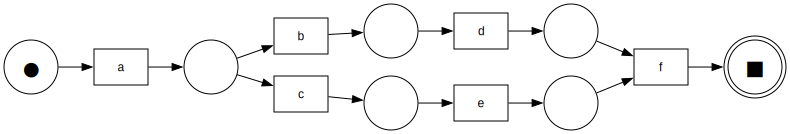

In [76]:
miner_unsound.build_and_visualize_petrinet()

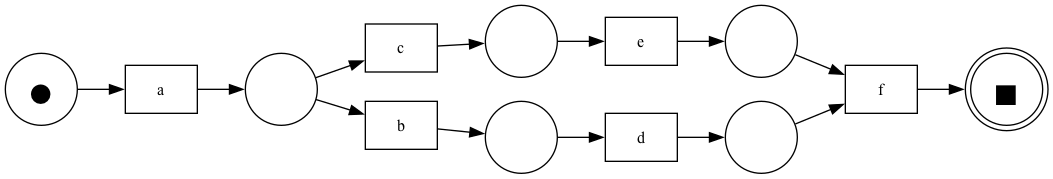

In [77]:
net, start, end = pm4py.discover_petri_net_alpha(utils.import_csv(unsound_log))
pm4py.view_petri_net(net, start, end)

## Real Example

In [78]:
miner_real = AlphaMiner("sorted_session_data1.csv")

In [79]:
miner_real.discover_footprints()

{'dfg': {('10-stappen', 'WDO211959'),
  ('50plus', 'mijn_berichten'),
  ('50plus', 'top20-vacatures'),
  ('50plus', 'vacatures_bij_mijn_cv'),
  ('PORTAL.wwsec_app_priv.logout', 'home'),
  ('Portal (ignore_request_page)', 'taken'),
  ('WDO211559', 'WDO211559'),
  ('WDO211559', 'inschrijven'),
  ('WDO211559', 'mijn_berichten'),
  ('WDO211559', 'mijn_cv'),
  ('WDO211559', 'mijn_tips'),
  ('WDO211559', 'mijn_werkmap'),
  ('WDO211559', 'taken'),
  ('WDO211559', 'vacatures_bij_mijn_cv'),
  ('WDO211559', 'vacatures_zoeken'),
  ('WDO211559', 'wdo_010304'),
  ('WDO211559', 'werkmap'),
  ('WDO211959', 'top20-vacatures'),
  ('aanvragen-ww', 'PORTAL.wwsec_app_priv.logout'),
  ('aanvragen-ww', 'aanvragen-ww'),
  ('aanvragen-ww', 'home'),
  ('aanvragen-ww', 'mijn_werkmap'),
  ('aanvragen-ww', 'overzicht'),
  ('bevestigingspagina', 'mijn_cv'),
  ('bijstandsuitkering', 'inschrijven'),
  ('certificaat-ervaring', 'wdo_014546'),
  ('eigen-bedrijf', '10-stappen'),
  ('email_uw_vraag', 'email_uw_vraag'),
 

In [80]:
miner_real.get_maximal_pairs()

[({'solliciteren', 'wdo_014546'}, {'online-training'}),
 ({'mijn_tips', 'vacatures_bij_mijn_cv'}, {'mijn_bewijs_van_inschrijving'}),
 ({'mijn_cv', 'overzicht'}, {'foutopgetreden.html'}),
 ({'ontwikkel-uzelf'}, {'opleiding'}),
 ({'inschrijven', 'overzicht'}, {'foutopgetreden.html'}),
 ({'mijn_bewijs_van_inschrijving', 'wijziging_doorgeven'},
  {'mijn_rechten_en_plichten'}),
 ({'overzicht', 'vacatures_bij_mijn_cv'}, {'foutopgetreden.html'}),
 ({'online-training'}, {'mijn_werkmap', 'ontwikkel-uzelf'}),
 ({'solliciteren'}, {'online-training', 'solliciteren-werk-zoeken'}),
 ({'50plus', 'WDO211959'}, {'top20-vacatures'}),
 ({'mijn_online_trainingen', 'mijn_tips'}, {'mijn_bewijs_van_inschrijving'}),
 ({'solliciteren'}, {'solliciteren-werk-zoeken', 'wdo_010304'}),
 ({'uitkering-aanvragen'}, {'ww'}),
 ({'solliciteren'}, {'online-training', 'taken'}),
 ({'mijn_online_trainingen', 'vacatures_bij_mijn_cv'},
  {'mijn_bewijs_van_inschrijving'}),
 ({'50plus'}, {'top20-vacatures', 'vacatures_bij_mijn_

In [81]:
miner_real.footprint_matrix()

,10-stappen,50plus,PORTAL.wwsbr_javascript.page_js,PORTAL.wwsec_app_priv.logout,Portal (ignore_request_page),WDO211559,WDO211959,aanvragen-ww,bevestigingspagina,bijstandsuitkering,...,wdo_010304,wdo_014546,werkmap,werkplan_lightbox,wijziging_doorgeven,ww,zoekAantalIndicatief,zoekBeroep,zoekBeroepenlijst,zoeken
10-stappen,#,#,#,#,#,#,→,#,#,#,...,#,#,#,#,#,#,#,#,#,#
50plus,#,#,#,#,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#
PORTAL.wwsbr_javascript.page_js,#,#,#,#,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#
PORTAL.wwsec_app_priv.logout,#,#,#,#,#,#,#,←,#,#,...,#,#,#,#,#,#,#,#,#,#
Portal (ignore_request_page),#,#,#,#,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ww,#,#,#,#,#,#,#,→,#,#,...,#,#,#,#,#,#,#,#,#,#
zoekAantalIndicatief,#,#,#,#,#,#,#,#,#,#,...,#,#,#,#,#,#,||,←,#,#
zoekBeroep,#,#,#,#,#,#,#,#,#,#,...,#,#,#,#,#,#,→,||,#,#
zoekBeroepenlijst,#,#,#,#,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,||,#


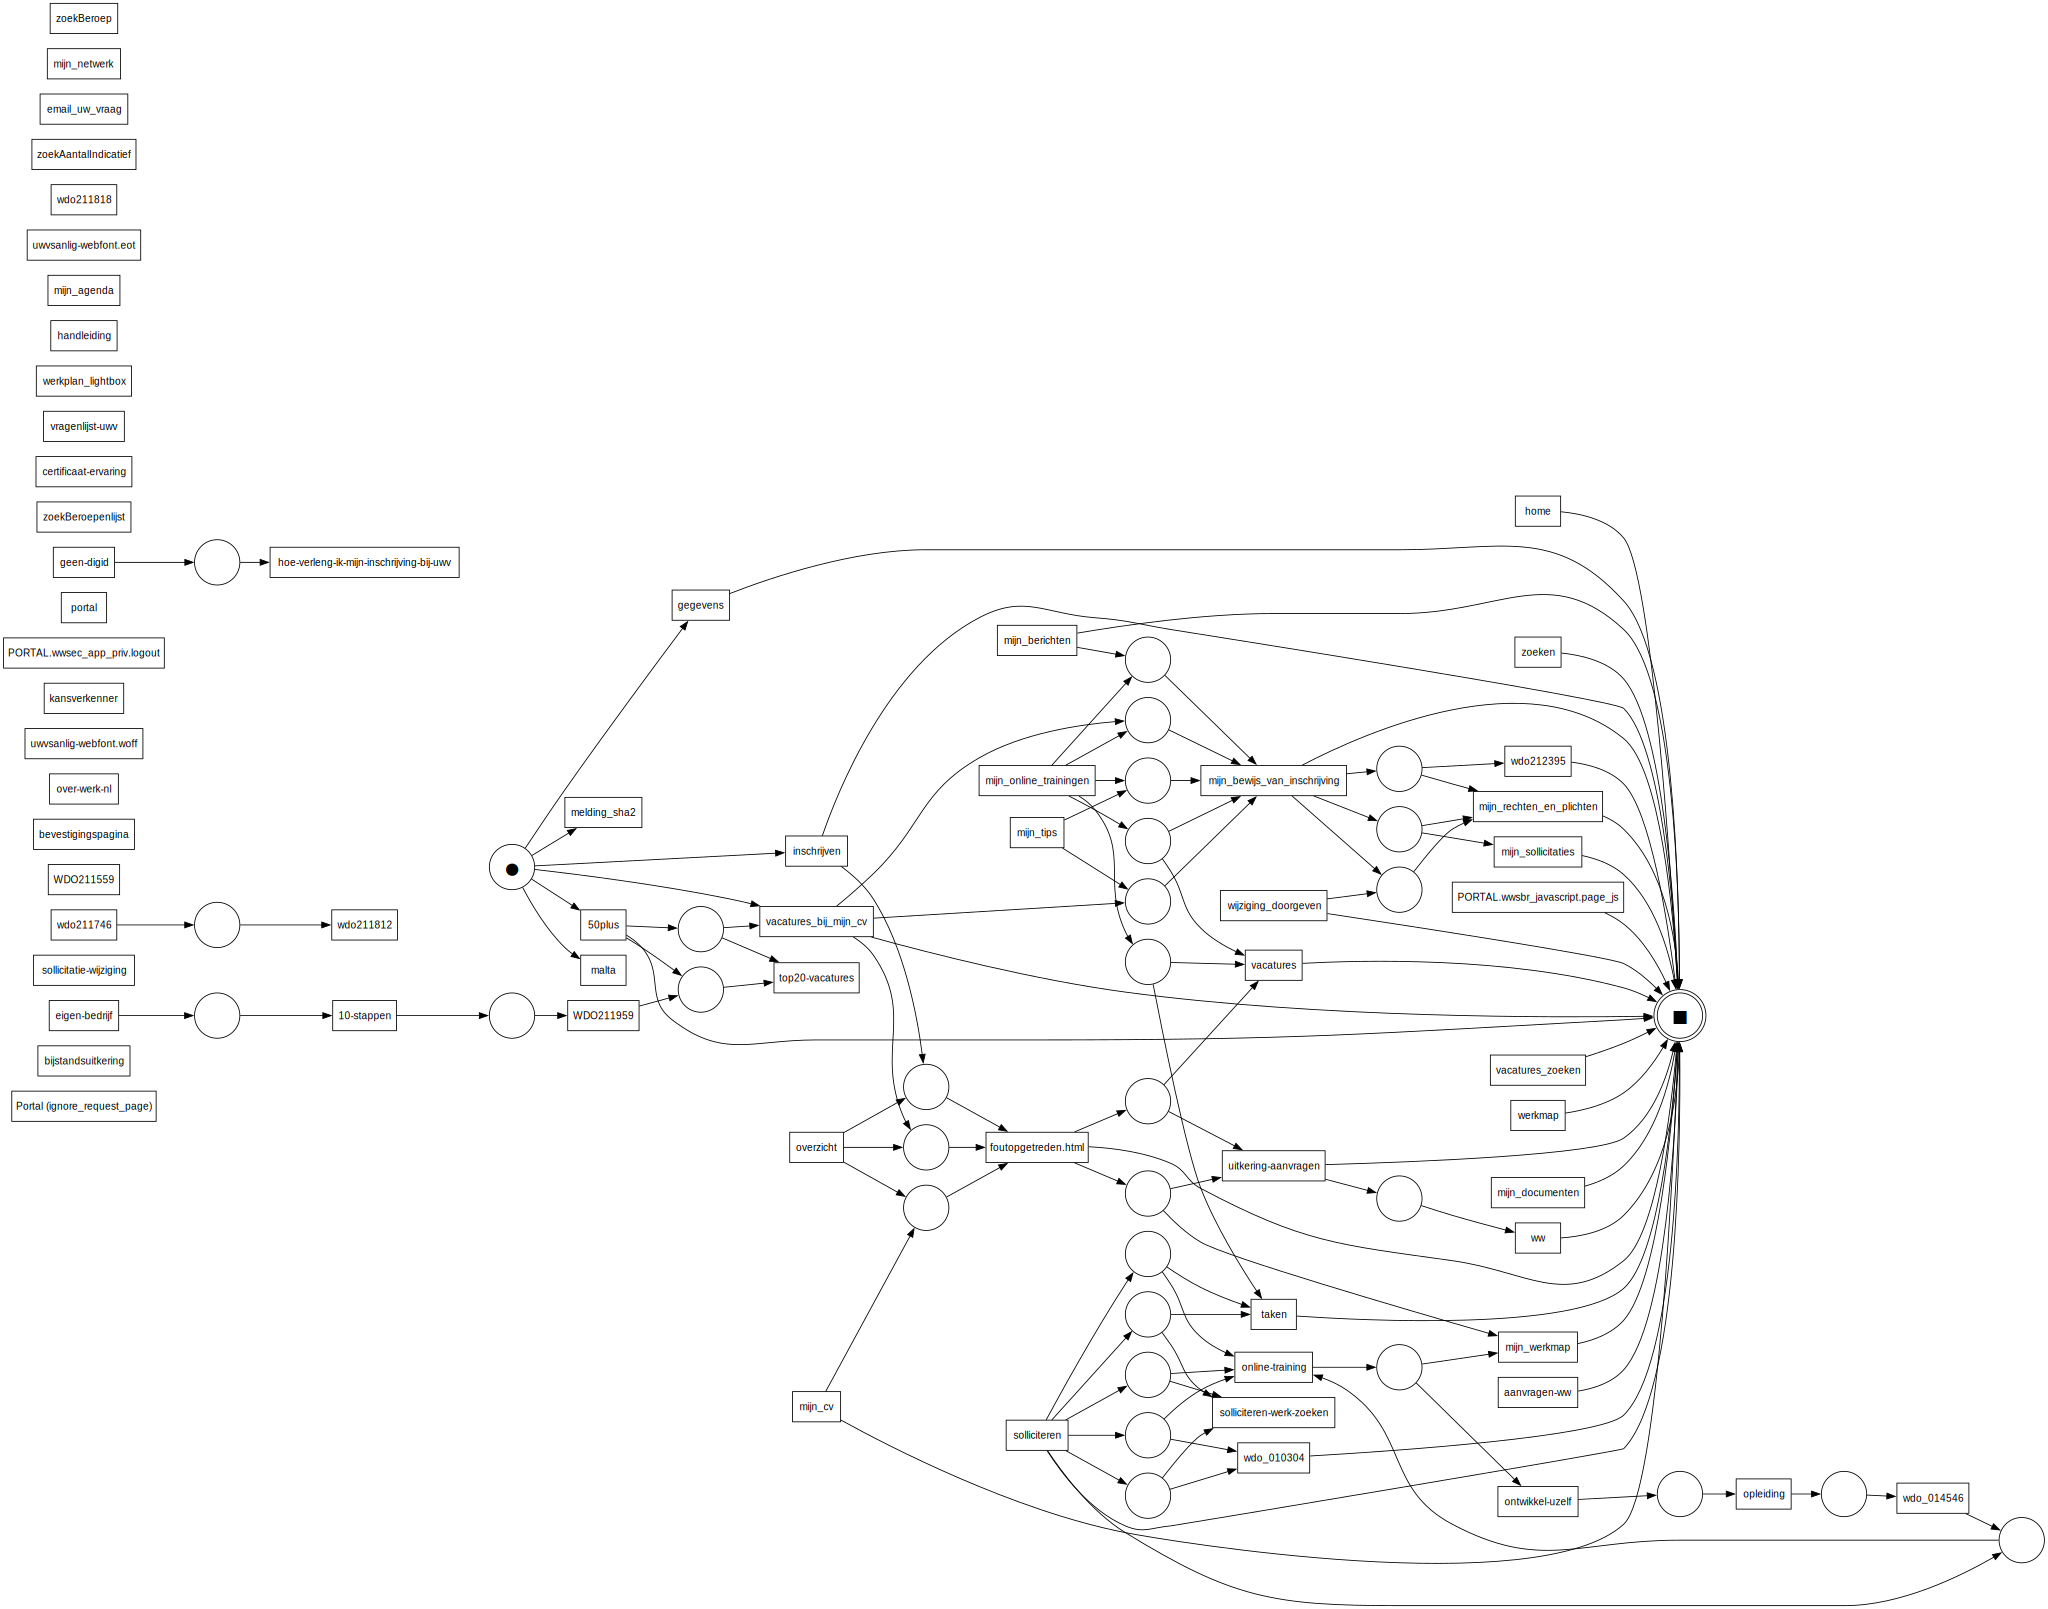

In [82]:
miner_real.build_and_visualize_petrinet()